In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Influence Estimation

In [2]:
rcParams_ticks = {
    'figure.dpi': 300,
    'xtick.bottom': True,
    'ytick.left': True,
    'legend.loc': 'best',
    'legend.fancybox': True,
    'axes.edgecolor': 'grey',
    'axes.xmargin': 0.05,
    'text.usetex': False,
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold'
}

sns.set_theme(style='ticks', rc=rcParams_ticks)

### Input Layer

In [3]:
# https://pluskid.github.io/influence-memorization/#cifar100-dl
cifar100_inf = np.load(".../cifar100_high_infl_pairs_infl0.15_mem0.25.npz", allow_pickle=True)
cifar100_infl_matrix_class = np.load(".../cifar100_infl_matrix.npz", allow_pickle=True)
tr_mem_mp = cifar100_infl_matrix_class['tr_mem']

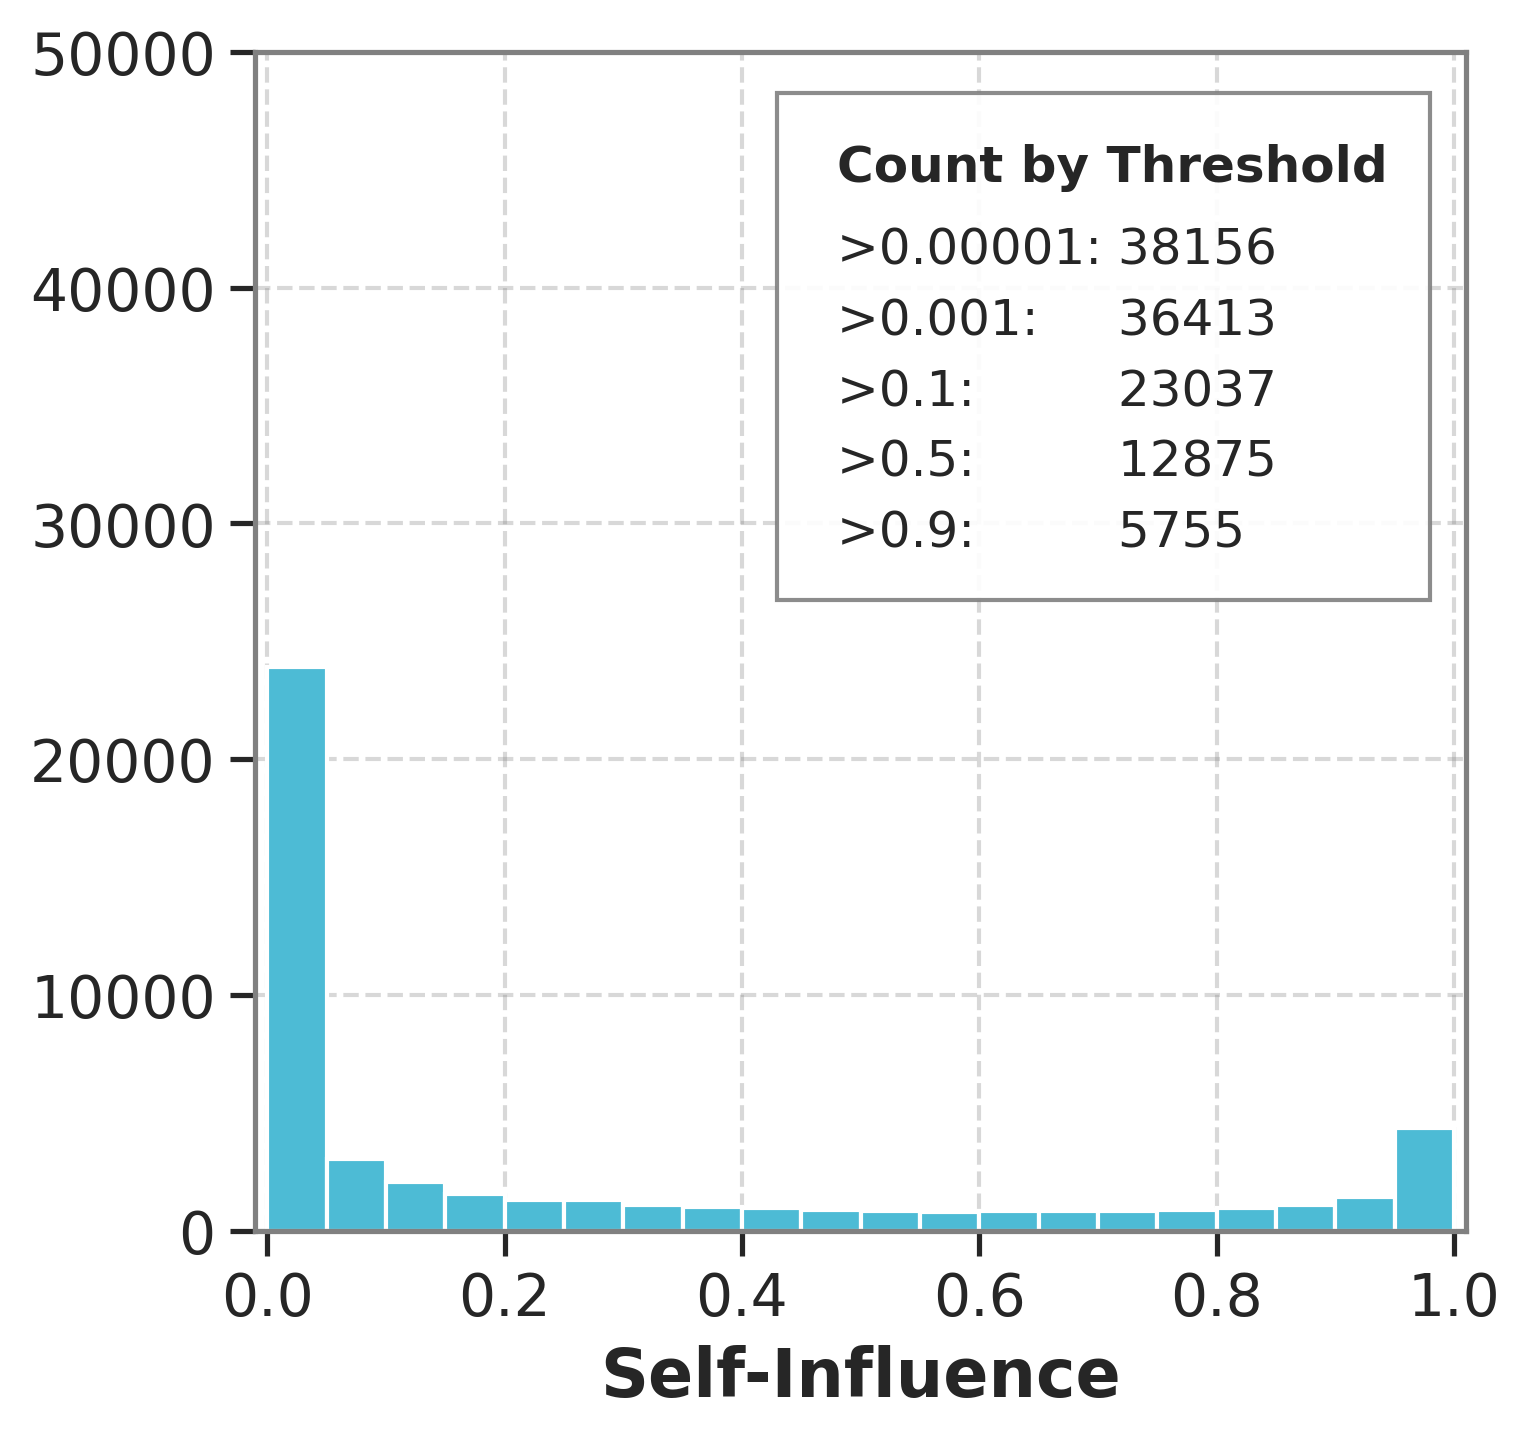

In [4]:
fig, ax = plt.subplots(figsize=(11.69 * 0.45, 8.27 * 0.6))

# Plot histogram
plt.hist(tr_mem_mp, 
         bins=np.arange(0, 1.05, 0.05),
         color='#4DBBD5',
         edgecolor='white',
         linewidth=1)

# Text styling
text_props = {
    'fontsize': 12,
    'fontfamily': 'sans-serif'
}

# Scale box position and height (roughly 2x)
box = plt.Rectangle((0.43, 26750), 0.55, 21500,
                   facecolor='white',
                   edgecolor='gray',
                   alpha=0.9,
                   linewidth=1,
                   transform=ax.transData)
ax.add_patch(box)

# Scale text positions (roughly 2x)
plt.text(0.48, 44500, "Count by Threshold",
         fontsize=12,
         fontweight='bold',
         fontfamily='sans-serif')

plt.text(0.48, 41000, f">0.00001: {(np.abs(tr_mem_mp)>0.00001).sum()}", **text_props)
plt.text(0.48, 38000, f">0.001:     {(np.abs(tr_mem_mp)>0.001).sum()}", **text_props)
plt.text(0.48, 35000, f">0.1:         {(np.abs(tr_mem_mp)>0.1).sum()}", **text_props)
plt.text(0.48, 32000, f">0.5:         {(np.abs(tr_mem_mp)>0.5).sum()}", **text_props)
plt.text(0.48, 29000, f">0.9:         {(np.abs(tr_mem_mp)>0.9).sum()}", **text_props)

plt.xlim((-0.01, 1.01))
plt.ylim((0, 50000))

plt.xlabel("Self-Influence", fontsize=16, fontweight='bold')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3, color='gray')

plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')
plt.tight_layout()
# plt.savefig("mem_cifar100_inp_yaligned.pdf", bbox_inches='tight')

### Last Layer

In [5]:
mem_est = np.load(f".../c100_mem_lastlayer_500.npy", allow_pickle=True)

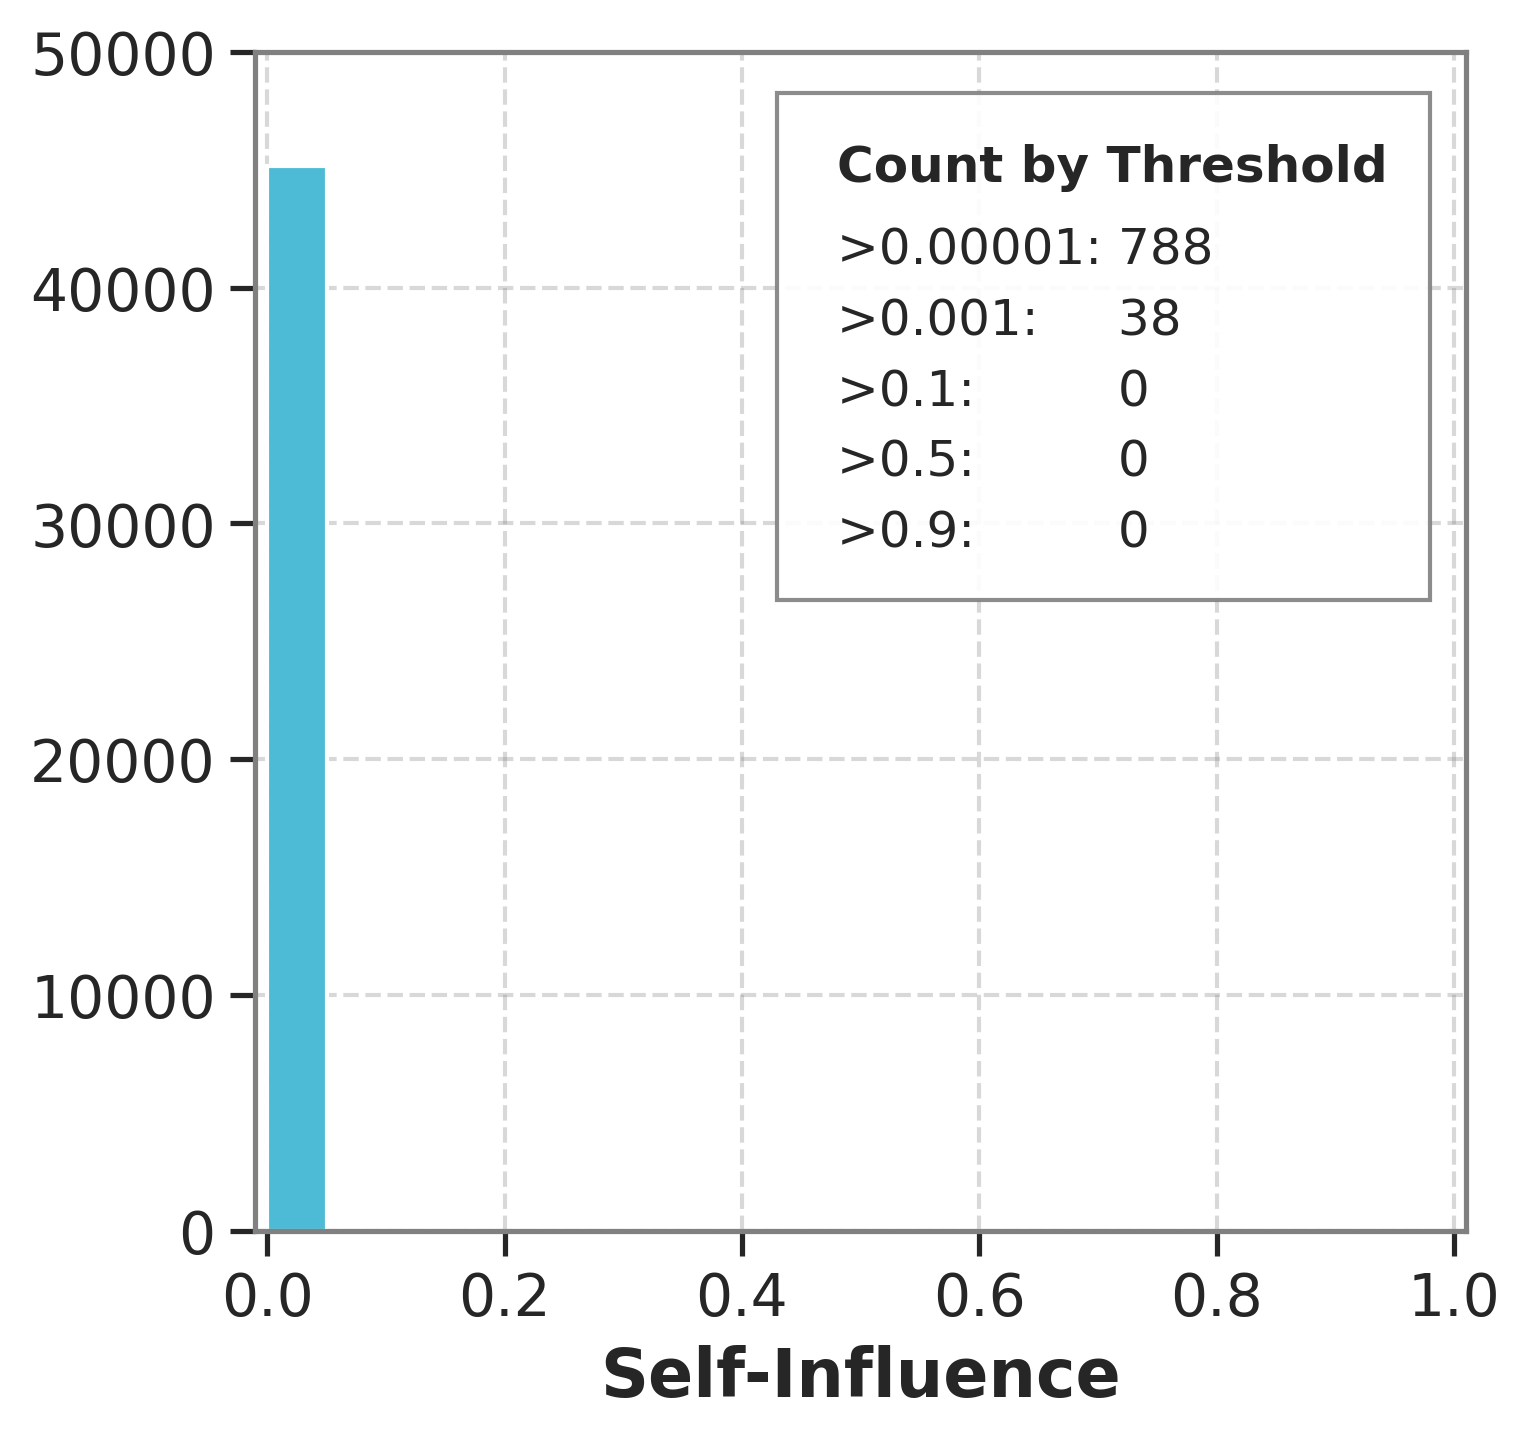

In [6]:
fig, ax = plt.subplots(figsize=(11.69 * 0.45, 8.27 * 0.6))

# Plot histogram
plt.hist(mem_est, 
         bins=np.arange(0, 1.05, 0.05),
         color='#4DBBD5',
         edgecolor='white',
         linewidth=1)

# Text styling
text_props = {
    'fontsize': 12,
    'fontfamily': 'sans-serif'
}

# Scale box position and height (roughly 2x)
box = plt.Rectangle((0.43, 26750), 0.55, 21500,
                   facecolor='white',
                   edgecolor='gray',
                   alpha=0.9,
                   linewidth=1,
                   transform=ax.transData)
ax.add_patch(box)

# Scale text positions (roughly 2x)
plt.text(0.48, 44500, "Count by Threshold",
         fontsize=12,
         fontweight='bold',
         fontfamily='sans-serif')

plt.text(0.48, 41000, f">0.00001: {(np.abs(mem_est)>0.00001).sum()}", **text_props)
plt.text(0.48, 38000, f">0.001:     {(np.abs(mem_est)>0.001).sum()}", **text_props)
plt.text(0.48, 35000, f">0.1:         {(np.abs(mem_est)>0.1).sum()}", **text_props)
plt.text(0.48, 32000, f">0.5:         {(np.abs(mem_est)>0.5).sum()}", **text_props)
plt.text(0.48, 29000, f">0.9:         {(np.abs(mem_est)>0.9).sum()}", **text_props)

plt.xlim((-0.01, 1.01))
plt.ylim((0, 50000))

plt.xlabel("Self-Influence", fontsize=16, fontweight='bold')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3, color='gray')

plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')
plt.tight_layout()
# plt.savefig("mem_cifar100_last.pdf", bbox_inches='tight')

## Extent of Impact of SVE

In [7]:
rcParams_ticks = {
    'figure.dpi': 300,
    'xtick.bottom': True,
    'ytick.left': True,
    'legend.loc': 'best',
    'legend.fancybox': True,
    'axes.edgecolor': 'grey',
    'axes.xmargin': 0.05,
    'text.usetex': False,
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold',
    'lines.linewidth': 3,
    'lines.markersize': 8
}

colors = ['#E64B35', '#4DBBD5', '#00A087']

sns.set_theme(style='ticks', rc=rcParams_ticks)

show_yticks = True
y_lims = None

SAVE_DIR = ''
DATASET = 'cifar10'
epochs_list = [1,5,10,20,30,40,50,60,70,80,90,100,200,300,400,500]
epochs_list = [1,5,10,100,200,300,400,500]

### Dataset

In [8]:
dataset_list = ['mnist', 'cifar10', 'cifar100']
base_dnn = 'resnet50'
t = 0.001  # gradient is considered zero if value below t

pct_non_zero_dict = {}
for ds in dataset_list:
    print(ds)
    pct_non_zero_list = []
    for trained_epochs in epochs_list:
        print(f"Epochs: {trained_epochs}")
        # DNN is MLP in MNIST but update name to resnet50 for ease of plotting
        alpha_js = np.load(f"{SAVE_DIR}/{ds}_{base_dnn}_alpha_j_{trained_epochs}e.npy", allow_pickle=True)

        num_gt_t = (np.abs(alpha_js) > t).sum()
        num_total = np.prod(alpha_js.shape)
        pct_gt_t = (num_gt_t / num_total) * 100

        pct_non_zero_list.append(pct_gt_t)
    pct_non_zero_dict[ds] = pct_non_zero_list

mnist
Epochs: 1
Epochs: 5
Epochs: 10
Epochs: 100
Epochs: 200
Epochs: 300
Epochs: 400
Epochs: 500
cifar10
Epochs: 1
Epochs: 5
Epochs: 10
Epochs: 100
Epochs: 200
Epochs: 300
Epochs: 400
Epochs: 500
cifar100
Epochs: 1
Epochs: 5
Epochs: 10
Epochs: 100
Epochs: 200
Epochs: 300
Epochs: 400
Epochs: 500


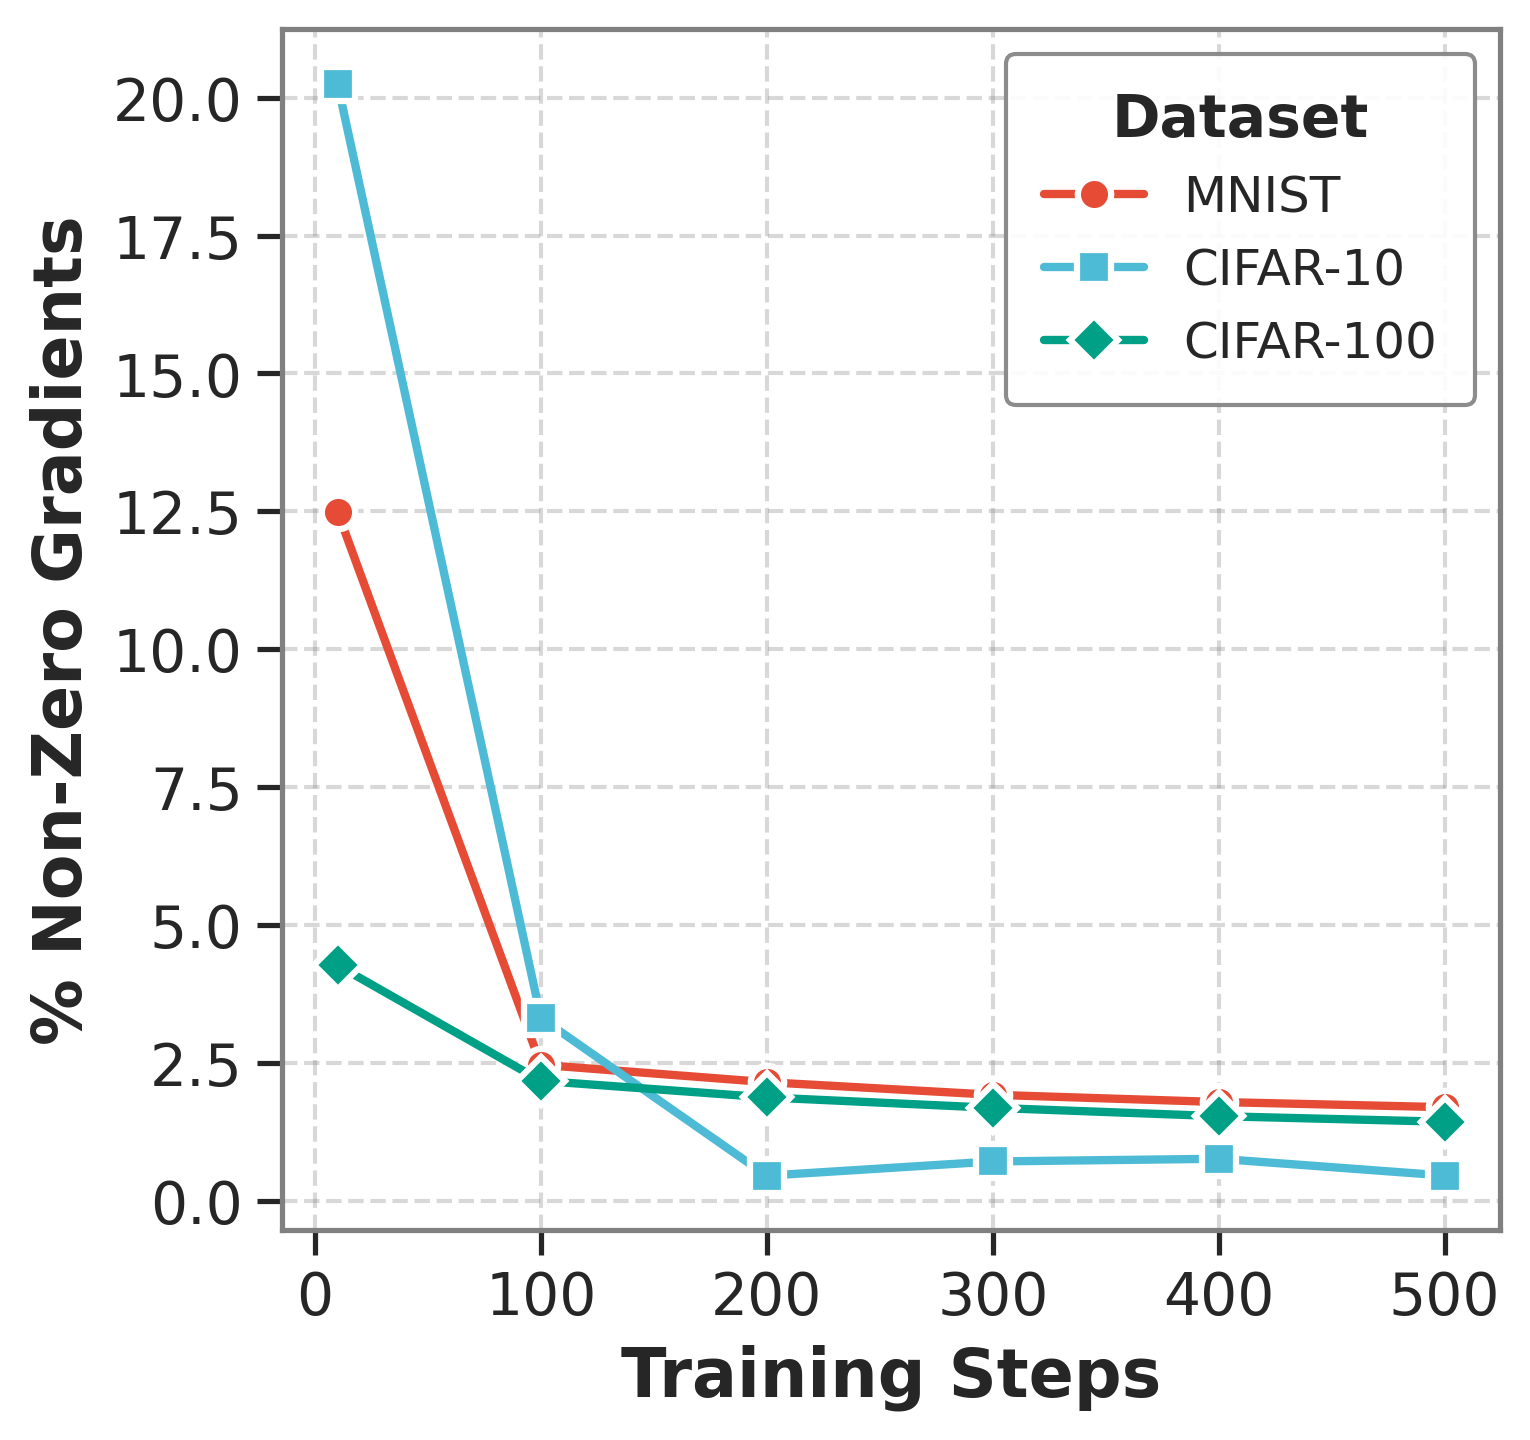

In [9]:
xlab = 'Training Steps'
ylab = '% Non-Zero Gradients'
leg_list = ['MNIST', 'CIFAR-10', 'CIFAR-100']
leg_title = 'Dataset'
markers = ['o', 's', 'D']  # Circle, Square, Diamond
linestyles = ['-', '-', '-']

start_ix = 2
end_ix = len(epochs_list)

plt.figure(figsize=(11.69 * 0.45, 8.27 * 0.6))
for i, (ds, label) in enumerate(zip(dataset_list, leg_list)):
    plt.plot(
        epochs_list[start_ix:end_ix],
        pct_non_zero_dict[ds][start_ix:end_ix],
        linestyle=linestyles[i],
        marker=markers[i],
        color=colors[i],
        label=label,
        markersize=8,
        markeredgewidth=1.5,
        markeredgecolor='white',
        linewidth=2
    )

plt.xlabel(xlab, fontsize=16, fontweight='bold')
if show_yticks:
    plt.ylabel(ylab, fontsize=16, fontweight='bold')
else:
    plt.gca().yaxis.set_ticklabels([])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
if y_lims is not None:
    plt.ylim(y_lims)

plt.legend(
    fontsize=12,
    title=leg_title,
    title_fontsize=14,
    frameon=True,
    framealpha=0.9,
    edgecolor='gray',
    fancybox=True,
    borderpad=0.75,
    labelspacing=0.5,
    loc='best'
)
plt.gca().get_legend().get_title().set_fontweight('bold')

# Use a light gray grid for better visibility
plt.grid(True, linestyle='--', alpha=0.3, color='gray')
plt.tight_layout()

# Set background color to white
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# plt.savefig("grads_evolution_dataset.pdf", bbox_inches='tight')
plt.show()

### Model Type

In [10]:
base_dnn_list = ['efficientnetb0', 'convnextbase', 'resnet50']
t = 0.001  # gradient is considered zero if value below t

pct_non_zero_dict = {}
for base_dnn in base_dnn_list:
    print(base_dnn)
    pct_non_zero_list = []
    for trained_epochs in epochs_list:
        print(f"Epochs: {trained_epochs}")
        alpha_js = np.load(f"{SAVE_DIR}/{DATASET}_{base_dnn}_alpha_j_{trained_epochs}e.npy", allow_pickle=True)

        num_gt_t = (np.abs(alpha_js) > t).sum()
        num_total = np.prod(alpha_js.shape)
        pct_gt_t = (num_gt_t / num_total) * 100

        pct_non_zero_list.append(pct_gt_t)
    pct_non_zero_dict[base_dnn] = pct_non_zero_list

efficientnetb0
Epochs: 1
Epochs: 5
Epochs: 10
Epochs: 100
Epochs: 200
Epochs: 300
Epochs: 400
Epochs: 500
convnextbase
Epochs: 1
Epochs: 5
Epochs: 10
Epochs: 100
Epochs: 200
Epochs: 300
Epochs: 400
Epochs: 500
resnet50
Epochs: 1
Epochs: 5
Epochs: 10
Epochs: 100
Epochs: 200
Epochs: 300
Epochs: 400
Epochs: 500


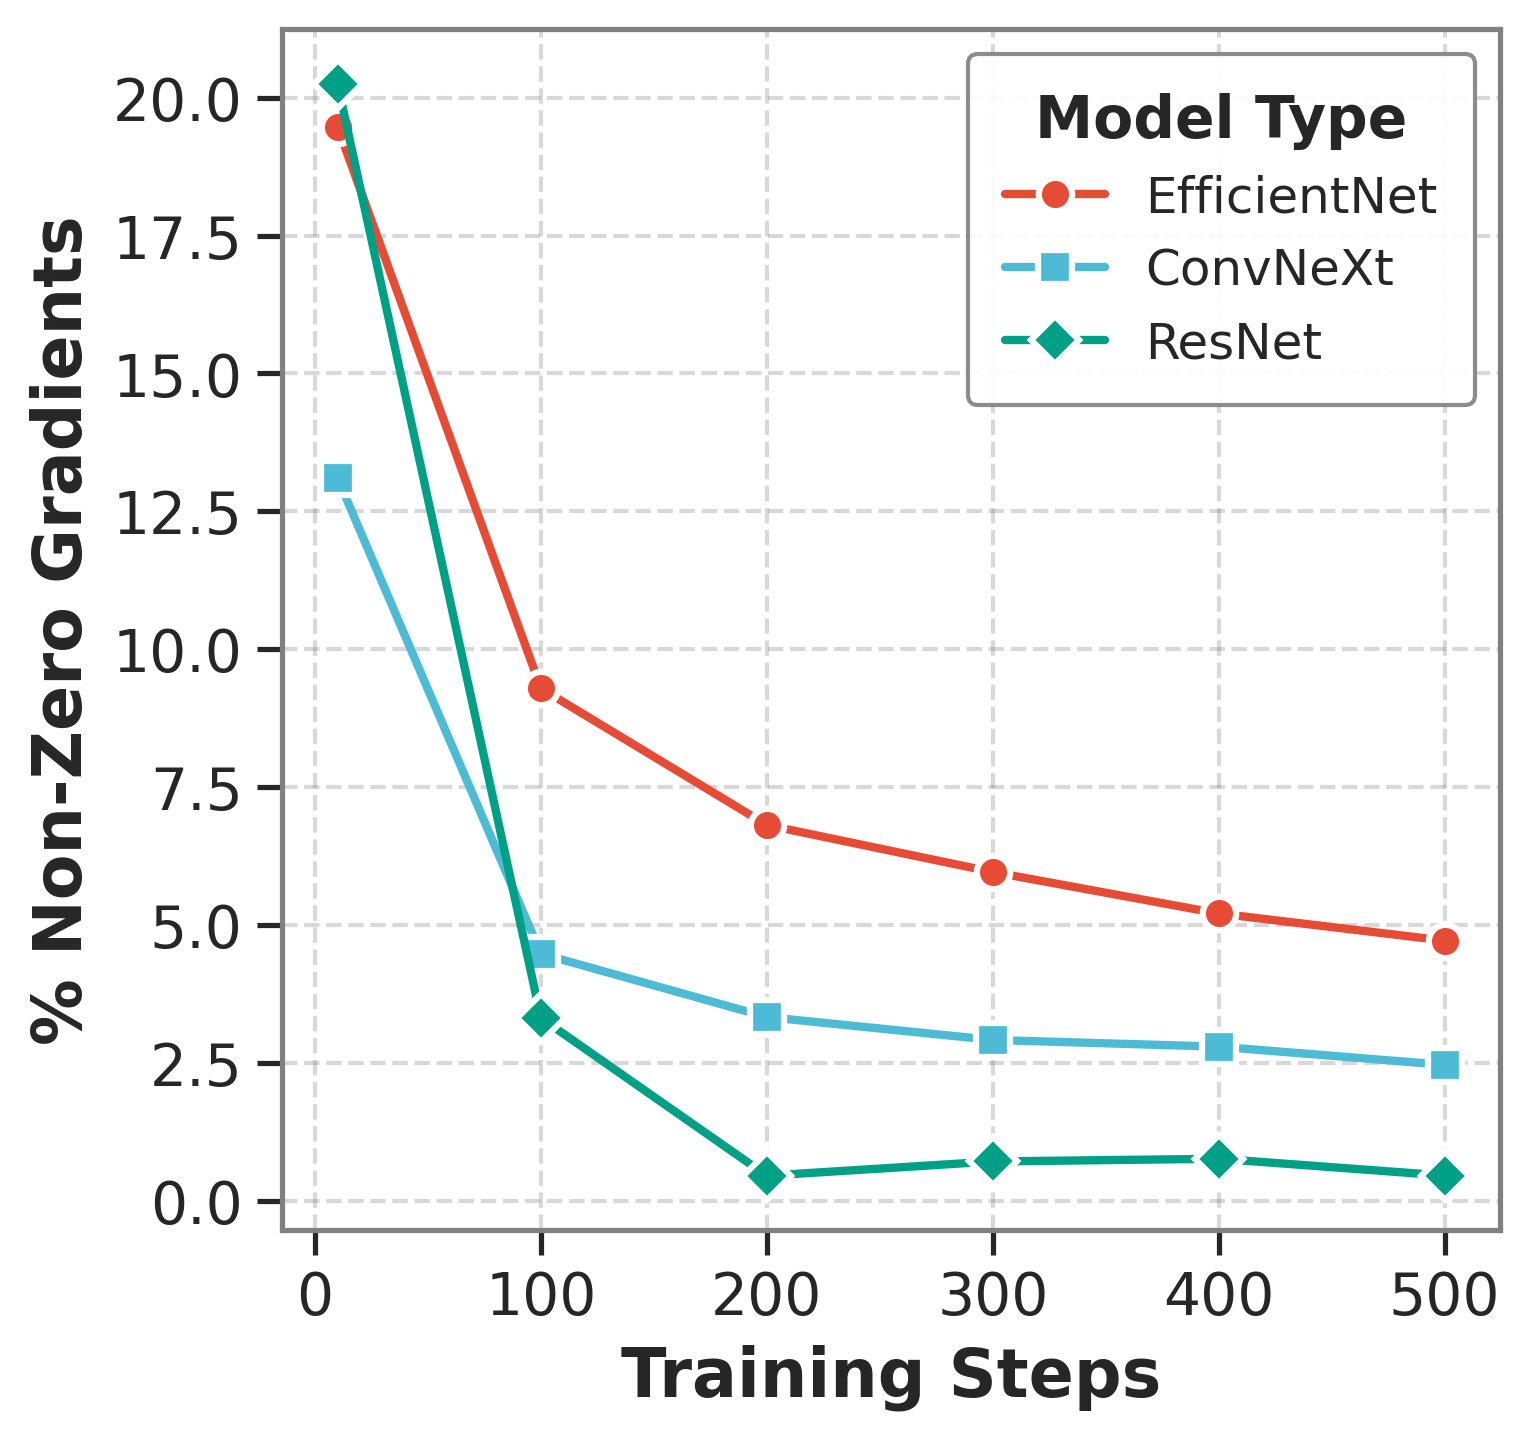

In [11]:
xlab = 'Training Steps'
ylab = '% Non-Zero Gradients'
leg_list = ['EfficientNet', 'ConvNeXt', 'ResNet']
leg_title = 'Model Type'
markers = ['o', 's', 'D']  # Circle, Square, Diamond
linestyles = ['-', '-', '-']

start_ix = 2
end_ix = len(epochs_list)

plt.figure(figsize=(11.69 * 0.45, 8.27 * 0.6))
for i, (base_dnn, label) in enumerate(zip(base_dnn_list, leg_list)):
    plt.plot(
        epochs_list[start_ix:end_ix],
        pct_non_zero_dict[base_dnn][start_ix:end_ix],
        linestyle=linestyles[i],
        marker=markers[i],
        color=colors[i],
        label=label,
        markersize=8,
        markeredgewidth=1.5,
        markeredgecolor='white',
        linewidth=2
    )

plt.xlabel(xlab, fontsize=16, fontweight='bold')
if show_yticks:
    plt.ylabel(ylab, fontsize=16, fontweight='bold')
else:
    plt.gca().yaxis.set_ticklabels([])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
if y_lims is not None:
    plt.ylim(y_lims)

plt.legend(
    fontsize=12,
    title=leg_title,
    title_fontsize=14,
    frameon=True,
    framealpha=0.9,
    edgecolor='gray',
    fancybox=True,
    borderpad=0.75,
    labelspacing=0.5,
    loc='best'
)
plt.gca().get_legend().get_title().set_fontweight('bold')

# Use a light gray grid for better visibility
plt.grid(True, linestyle='--', alpha=0.3, color='gray')
plt.tight_layout()

# Set background color to white
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# plt.savefig("grads_evolution_type.pdf", bbox_inches='tight')
plt.show()

### Model Size

In [12]:
base_dnn_list = ['efficientnetb0', 'efficientnetb2', 'efficientnetb4']
t = 0.001  # gradient is considered zero if value below t

pct_non_zero_dict = {}
for base_dnn in base_dnn_list:
    print(base_dnn)
    pct_non_zero_list = []
    for trained_epochs in epochs_list:
        print(f"Epochs: {trained_epochs}")
        alpha_js = np.load(f"{SAVE_DIR}/{DATASET}_{base_dnn}_alpha_j_{trained_epochs}e.npy", allow_pickle=True)

        num_gt_t = (np.abs(alpha_js) > t).sum()
        num_total = np.prod(alpha_js.shape)
        pct_gt_t = (num_gt_t / num_total) * 100

        pct_non_zero_list.append(pct_gt_t)
    pct_non_zero_dict[base_dnn] = pct_non_zero_list

efficientnetb0
Epochs: 1
Epochs: 5
Epochs: 10
Epochs: 100
Epochs: 200
Epochs: 300
Epochs: 400
Epochs: 500
efficientnetb2
Epochs: 1
Epochs: 5
Epochs: 10
Epochs: 100
Epochs: 200
Epochs: 300
Epochs: 400
Epochs: 500
efficientnetb4
Epochs: 1
Epochs: 5
Epochs: 10
Epochs: 100
Epochs: 200
Epochs: 300
Epochs: 400
Epochs: 500


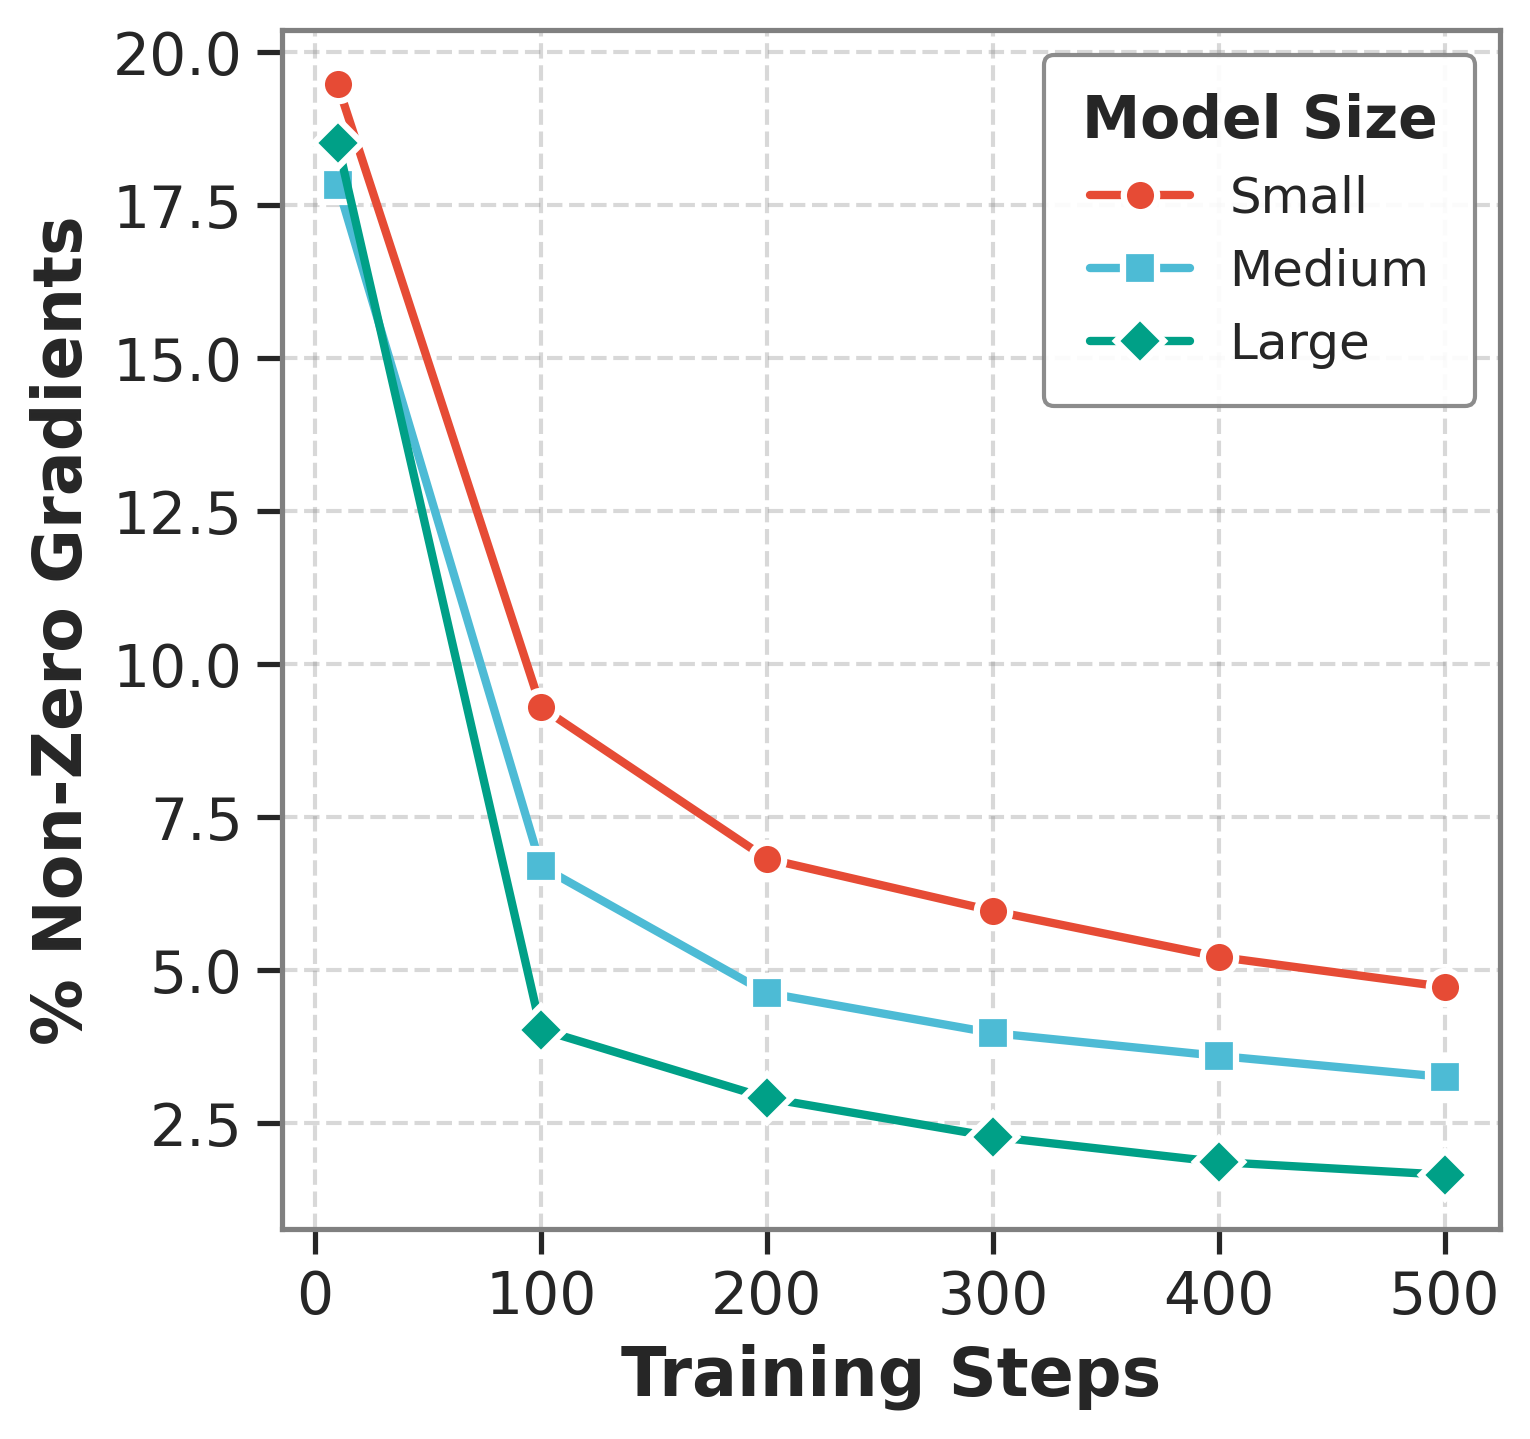

In [13]:
xlab = 'Training Steps'
ylab = '% Non-Zero Gradients'
leg_list = ['Small', 'Medium', 'Large']
leg_title = 'Model Size'
markers = ['o', 's', 'D']  # Circle, Square, Diamond
linestyles = ['-', '-', '-']

start_ix = 2
end_ix = len(epochs_list)

plt.figure(figsize=(11.69 * 0.45, 8.27 * 0.6))
for i, (base_dnn, label) in enumerate(zip(base_dnn_list, leg_list)):
    plt.plot(
        epochs_list[start_ix:end_ix],
        pct_non_zero_dict[base_dnn][start_ix:end_ix],
        linestyle=linestyles[i],
        marker=markers[i],
        color=colors[i],
        label=label,
        markersize=8,
        markeredgewidth=1.5,
        markeredgecolor='white',
        linewidth=2
    )

plt.xlabel(xlab, fontsize=16, fontweight='bold')
if show_yticks:
    plt.ylabel(ylab, fontsize=16, fontweight='bold')
else:
    plt.gca().yaxis.set_ticklabels([])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
if y_lims is not None:
    plt.ylim(y_lims)

plt.legend(
    fontsize=12,
    title=leg_title,
    title_fontsize=14,
    frameon=True,
    framealpha=0.9,
    edgecolor='gray',
    fancybox=True,
    borderpad=0.75,
    labelspacing=0.5,
    loc='best'
)
plt.gca().get_legend().get_title().set_fontweight('bold')

# Use a light gray grid for better visibility
plt.grid(True, linestyle='--', alpha=0.3, color='gray')
plt.tight_layout()

# Set background color to white
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# plt.savefig("grads_evolution_size.pdf", bbox_inches='tight')
plt.show()

### Optimizer

In [14]:
base_dnn_list = ['resnet50_adagrad', 'resnet50_rmsprop', 'resnet50_adam']
t = 0.001  # gradient is considered zero if value below t

pct_non_zero_dict = {}
for base_dnn in base_dnn_list:
    print(base_dnn)
    pct_non_zero_list = []
    for trained_epochs in epochs_list:
        print(f"Epochs: {trained_epochs}")
        alpha_js = np.load(f"{SAVE_DIR}/{DATASET}_{base_dnn}_alpha_j_{trained_epochs}e.npy", allow_pickle=True)

        num_gt_t = (np.abs(alpha_js) > t).sum()
        num_total = np.prod(alpha_js.shape)
        pct_gt_t = (num_gt_t / num_total) * 100

        pct_non_zero_list.append(pct_gt_t)
    pct_non_zero_dict[base_dnn] = pct_non_zero_list

resnet50_adagrad
Epochs: 1
Epochs: 5
Epochs: 10
Epochs: 100
Epochs: 200
Epochs: 300
Epochs: 400
Epochs: 500
resnet50_rmsprop
Epochs: 1
Epochs: 5
Epochs: 10
Epochs: 100
Epochs: 200
Epochs: 300
Epochs: 400
Epochs: 500
resnet50_adam
Epochs: 1
Epochs: 5
Epochs: 10
Epochs: 100
Epochs: 200
Epochs: 300
Epochs: 400
Epochs: 500


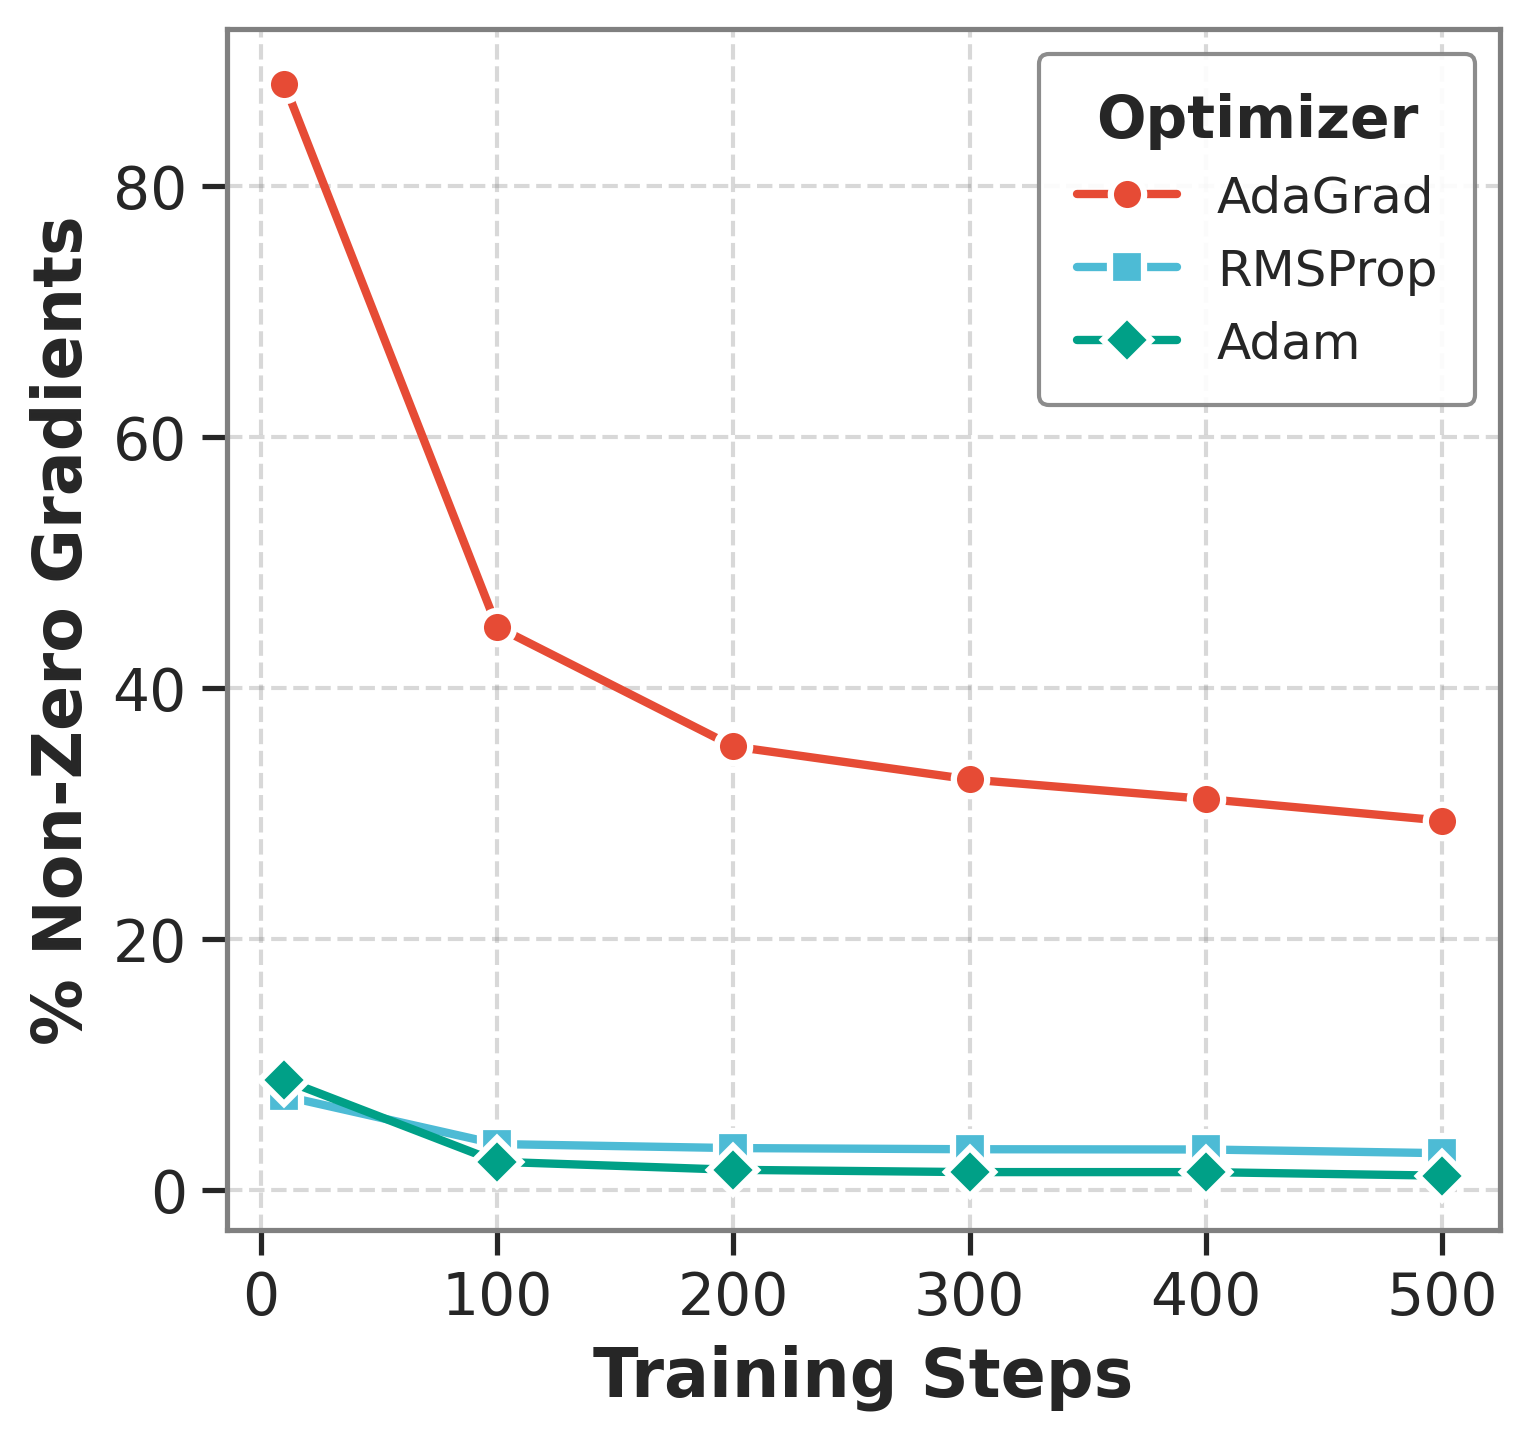

In [15]:
xlab = 'Training Steps'
ylab = '% Non-Zero Gradients'
leg_list = ['AdaGrad', 'RMSProp', 'Adam']
leg_title = 'Optimizer'
markers = ['o', 's', 'D']  # Circle, Square, Diamond
linestyles = ['-', '-', '-']

start_ix = 2
end_ix = len(epochs_list)

plt.figure(figsize=(11.69 * 0.45, 8.27 * 0.6))
for i, (base_dnn, label) in enumerate(zip(base_dnn_list, leg_list)):
    plt.plot(
        epochs_list[start_ix:end_ix],
        pct_non_zero_dict[base_dnn][start_ix:end_ix],
        linestyle=linestyles[i],
        marker=markers[i],
        color=colors[i],
        label=label,
        markersize=8,
        markeredgewidth=1.5,
        markeredgecolor='white',
        linewidth=2
    )

plt.xlabel(xlab, fontsize=16, fontweight='bold')
if show_yticks:
    plt.ylabel(ylab, fontsize=16, fontweight='bold')
else:
    plt.gca().yaxis.set_ticklabels([])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
if y_lims is not None:
    plt.ylim(y_lims)

plt.legend(
    fontsize=12,
    title=leg_title,
    title_fontsize=14,
    frameon=True,
    framealpha=0.9,
    edgecolor='gray',
    fancybox=True,
    borderpad=0.75,
    labelspacing=0.5,
    loc='best'
)
plt.gca().get_legend().get_title().set_fontweight('bold')

# Use a light gray grid for better visibility
plt.grid(True, linestyle='--', alpha=0.3, color='gray')
plt.tight_layout()

# Set background color to white
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# plt.savefig("grads_evolution_optimizers.pdf", bbox_inches='tight')
plt.show()

## Exemplar Effect

### Without Data Poisoning

In [17]:
BASE_DIR = ""
trained_epochs = 100
base_dnn = 'resnet50'

In [18]:
r=1000
for ds in ['mnist', 'cifar10', 'cifar100']:
    print(f"\n{ds}")
    inf = np.load(f"{BASE_DIR}/{ds}_{base_dnn}_representer_val_{trained_epochs}e.npy", allow_pickle=True)
    inf = -1*inf
    if ds == 'cifar100':
        r=100

    for k in [1,3,10]:
        ix_top_list = []
        for j in range(inf.shape[0]):
          inf_j = inf[j].copy()
          get_largest = False
          if get_largest:
            ix_top = np.argpartition(inf_j, -k)[-k:]
          else:
            ix_top = np.argpartition(inf_j, k-1)[:k]

          ix_top_list.append(ix_top)

        ix_top_list = np.array(ix_top_list)

        val_counts = {v:c for v, c in zip(*np.unique(ix_top_list, return_counts=True)) if c>=r}
        print(f"{len(val_counts)} training images found repeatedly in top-{k} of {r}+ test images.")


mnist
3 training images found repeatedly in top-1 of 1000+ test images.
11 training images found repeatedly in top-3 of 1000+ test images.
43 training images found repeatedly in top-10 of 1000+ test images.

cifar10
0 training images found repeatedly in top-1 of 1000+ test images.
4 training images found repeatedly in top-3 of 1000+ test images.
30 training images found repeatedly in top-10 of 1000+ test images.

cifar100
78 training images found repeatedly in top-1 of 100+ test images.
220 training images found repeatedly in top-3 of 100+ test images.
796 training images found repeatedly in top-10 of 100+ test images.


In [19]:
r=900
for ds in ['mnist', 'cifar10', 'cifar100']:
    print(f"\n{ds}")
    inf = np.load(f"{BASE_DIR}/{ds}_{base_dnn}_representer_val_{trained_epochs}e.npy", allow_pickle=True)
    inf = -1*inf
    if ds == 'cifar100':
        r=90

    for k in [1,3,10]:
        ix_top_list = []
        for j in range(inf.shape[0]):
          inf_j = inf[j].copy()
          get_largest = False
          if get_largest:
            ix_top = np.argpartition(inf_j, -k)[-k:]
          else:
            ix_top = np.argpartition(inf_j, k-1)[:k]

          ix_top_list.append(ix_top)

        ix_top_list = np.array(ix_top_list)

        val_counts = {v:c for v, c in zip(*np.unique(ix_top_list, return_counts=True)) if c>=r}
        print(f"{len(val_counts)} training images found repeatedly in top-{k} of {r}+ test images.")


mnist
7 training images found repeatedly in top-1 of 900+ test images.
24 training images found repeatedly in top-3 of 900+ test images.
79 training images found repeatedly in top-10 of 900+ test images.

cifar10
4 training images found repeatedly in top-1 of 900+ test images.
10 training images found repeatedly in top-3 of 900+ test images.
57 training images found repeatedly in top-10 of 900+ test images.

cifar100
88 training images found repeatedly in top-1 of 90+ test images.
249 training images found repeatedly in top-3 of 90+ test images.
888 training images found repeatedly in top-10 of 90+ test images.


### With Data Poisoning

In [2]:
BASE_DIR = ""  # set to whatever directory you are working/saving in
pct_poison = 1

In [18]:
r=1000
for ds in ['mnist', 'cifar10', 'cifar100']:
    print(f"\n{ds}")
    inf = np.load(f"{BASE_DIR}/{ds}_representer_val_{pct_poison}dp.npy", allow_pickle=True)
    inf = -1*inf
    if ds == 'cifar100':
        r=100

    for k in [1,3,10]:
        ix_top_list = []
        for j in range(inf.shape[0]):
          inf_j = inf[j].copy()
          get_largest = False
          if get_largest:
            ix_top = np.argpartition(inf_j, -k)[-k:]
          else:
            ix_top = np.argpartition(inf_j, k-1)[:k]

          ix_top_list.append(ix_top)

        ix_top_list = np.array(ix_top_list)

        val_counts = {v:c for v, c in zip(*np.unique(ix_top_list, return_counts=True)) if c>=r}
        poisonned = np.where(ix_poisonned == 1)[0]
        print(f"{len([i for i in list(val_counts.keys()) if i in poisonned])} of {len(val_counts)} training images found repeatedly in top-{k} of {r}+ test images were from poisonned data.")


mnist
3 of 3 training images found repeatedly in top-1 of 1000+ test images were from poisonned data.
12 of 12 training images found repeatedly in top-3 of 1000+ test images were from poisonned data.
36 of 41 training images found repeatedly in top-10 of 1000+ test images were from poisonned data.

cifar10
2 of 2 training images found repeatedly in top-1 of 1000+ test images were from poisonned data.
11 of 11 training images found repeatedly in top-3 of 1000+ test images were from poisonned data.
45 of 55 training images found repeatedly in top-10 of 1000+ test images were from poisonned data.

cifar100
26 of 27 training images found repeatedly in top-1 of 100+ test images were from poisonned data.
178 of 188 training images found repeatedly in top-3 of 100+ test images were from poisonned data.
497 of 844 training images found repeatedly in top-10 of 100+ test images were from poisonned data.


# Data Subset Selection

In [20]:
rcParams_ticks = {
    'figure.dpi': 300,
    'xtick.bottom': True,
    'ytick.left': True,
    'legend.loc': 'best',
    'legend.fancybox': True,
    'axes.edgecolor': 'grey',
    'axes.xmargin': 0.05,
    'text.usetex': False,
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold',
    'lines.linewidth': 3,
    'lines.markersize': 8
}

colors = ['#E64B35', '#4DBBD5', '#00A087']  # Red, Light Blue, Teal

sns.set_theme(style='ticks', rc=rcParams_ticks)

show_yticks = True
y_lims = None

In [21]:
# Run different strategies using CORDS: https://github.com/decile-team/cords
df = pd.read_csv(".../dss_compare.csv")
df.head()

,Dataset,Model,Selection Strategy,Top-1 Test Accuracy 1%,Top-1 Test Accuracy 5%,Top-1 Test Accuracy 10%,Top-1 Test Accuracy 30%,Training Time 1%,Training Time 5%,Training Time 10%,Training Time 30%
0,CIFAR10,ResNet18,FULL (skyline for test accuracy),95.19,95.19,95.19,95.19,1.727369,1.727369,1.727369,1.727369
1,CIFAR10,ResNet18,RANDOM (skyline for training time),39.91,63.52,77.47,89.62,0.016460,0.080304,0.172237,0.506287
2,CIFAR10,ResNet18,ADAPTIVE-RANDOM (skyline for training time),63.71,88.20,91.09,94.05,0.016322,0.081361,0.177631,0.506837
3,CIFAR10,ResNet18,GLISTER,38.20,79.02,90.67,93.04,0.085390,0.160182,0.230156,0.576149
4,CIFAR10,ResNet18,CRAIGPB,64.11,84.35,88.97,92.99,0.139407,0.193425,0.265448,0.607561


In [22]:
df.columns = ['dataset', 'model', 'selection_strategy', 'acc_1p', 'acc_5p', 'acc_10p', 'acc_30p', 'time_1p', 'time_5p', 'time_10p', 'time_30p']

df.loc[df['selection_strategy'] == 'FULL (skyline for test accuracy)', 'selection_strategy'] = 'Full'
df.loc[df['selection_strategy'] == 'RANDOM (skyline for training time)', 'selection_strategy'] = 'Random (Fixed)'
df.loc[df['selection_strategy'] == 'ADAPTIVE-RANDOM (skyline for training time)', 'selection_strategy'] = 'Random'
df.loc[df['selection_strategy'] == 'CRAIGPB', 'selection_strategy'] = 'CRAIG'
df.loc[df['selection_strategy'] == 'GRADMATCHPB', 'selection_strategy'] = 'GradMatch'

df = df[df['selection_strategy'] != 'MILO (Fixed)']
df = df[df['selection_strategy'] != 'MILO']

# use time in minutes
df.time_1p *= 60
df.time_5p *= 60
df.time_10p *= 60
df.time_30p *= 60

df.sample(5)

,dataset,model,selection_strategy,acc_1p,acc_5p,acc_10p,acc_30p,time_1p,time_5p,time_10p,time_30p
21,CIFAR100,ResNet18,GradMatch,24.40,54.42,65.93,73.57,4.723800,8.3040,12.750000,29.256000
3,CIFAR10,ResNet18,GLISTER,38.20,79.02,90.67,93.04,5.123383,9.6109,13.809367,34.568933
13,CIFAR10,ResNet101,GradMatch,27.23,71.71,86.35,93.39,7.902650,14.2918,22.171400,53.475533
8,CIFAR10,ResNet101,Full,95.01,95.01,95.01,95.01,156.420000,156.4200,156.420000,156.420000
32,TinyImageNet,ResNet18,Full,52.44,52.44,52.44,52.44,924.660000,924.6600,924.660000,924.660000


In [23]:
df_c10_r18 = df[(df['model'] == 'ResNet18') & (df['dataset'] == 'CIFAR10')].copy()
df_c10_r101 = df[(df['model'] == 'ResNet101') & (df['dataset'] == 'CIFAR10')].copy()
df_c100_r18 = df[(df['model'] == 'ResNet18') & (df['dataset'] == 'CIFAR100')].copy()
df_c100_r101 = df[(df['model'] == 'ResNet101') & (df['dataset'] == 'CIFAR100')].copy()
df_ti_r18 = df[(df['model'] == 'ResNet18') & (df['dataset'] == 'TinyImageNet')].copy()
df_ti_r101 = df[(df['model'] == 'ResNet101') & (df['dataset'] == 'TinyImageNet')].copy()

print(df_c10_r18.shape, df_c10_r101.shape)
print(df_c100_r18.shape, df_c100_r101.shape)
print(df_ti_r18.shape, df_ti_r101.shape)

df_ti_r18

(6, 11) (6, 11)
(6, 11) (6, 11)
(6, 11) (6, 11)


,dataset,model,selection_strategy,acc_1p,acc_5p,acc_10p,acc_30p,time_1p,time_5p,time_10p,time_30p
32,TinyImageNet,ResNet18,Full,52.4400,52.44,52.44,52.44,924.66,924.66,924.66,924.66
33,TinyImageNet,ResNet18,Random (Fixed),3.2100,13.00,19.61,35.68,10.26,52.44,109.20,299.40
34,TinyImageNet,ResNet18,Random,0.6200,27.34,38.73,50.30,10.08,49.92,109.20,307.20
35,TinyImageNet,ResNet18,GLISTER,0.9667,25.53,36.41,46.86,82.50,123.66,169.38,358.08
36,TinyImageNet,ResNet18,CRAIG,1.3100,22.31,34.21,4.31,118.80,153.60,194.46,385.20
37,TinyImageNet,ResNet18,GradMatch,3.2100,28.41,35.64,50.34,100.80,121.20,160.44,357.24


In [24]:
fname = 'c10_resnet18'
df_curr = df_c10_r18.copy()
# fname = 'c100_resnet18'
# df_curr = df_c100_r18.copy()
# fname = 'ti_resnet18'
# df_curr = df_ti_r18.copy()
# fname = 'c10_resnet101'
# df_curr = df_c10_r101.copy()
# fname = 'c100_resnet101'
# df_curr = df_c100_r101.copy()
# fname = 'ti_resnet101'
# df_curr = df_ti_r101.copy()

include_stdev = False

subset_sizes = [1, 5, 10, 30]

plt_dict_acc = {}
for _, r in df_curr.iterrows():
  plt_dict_acc[r.selection_strategy] = np.array([r.acc_1p, r.acc_5p, r.acc_10p, r.acc_30p])

plt_dict_time = {}
for _, r in df_curr.iterrows():
  plt_dict_time[r.selection_strategy] = np.array([r.time_1p, r.time_5p, r.time_10p, r.time_30p])

/tmp/ipykernel_85471/723511410.py:117: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


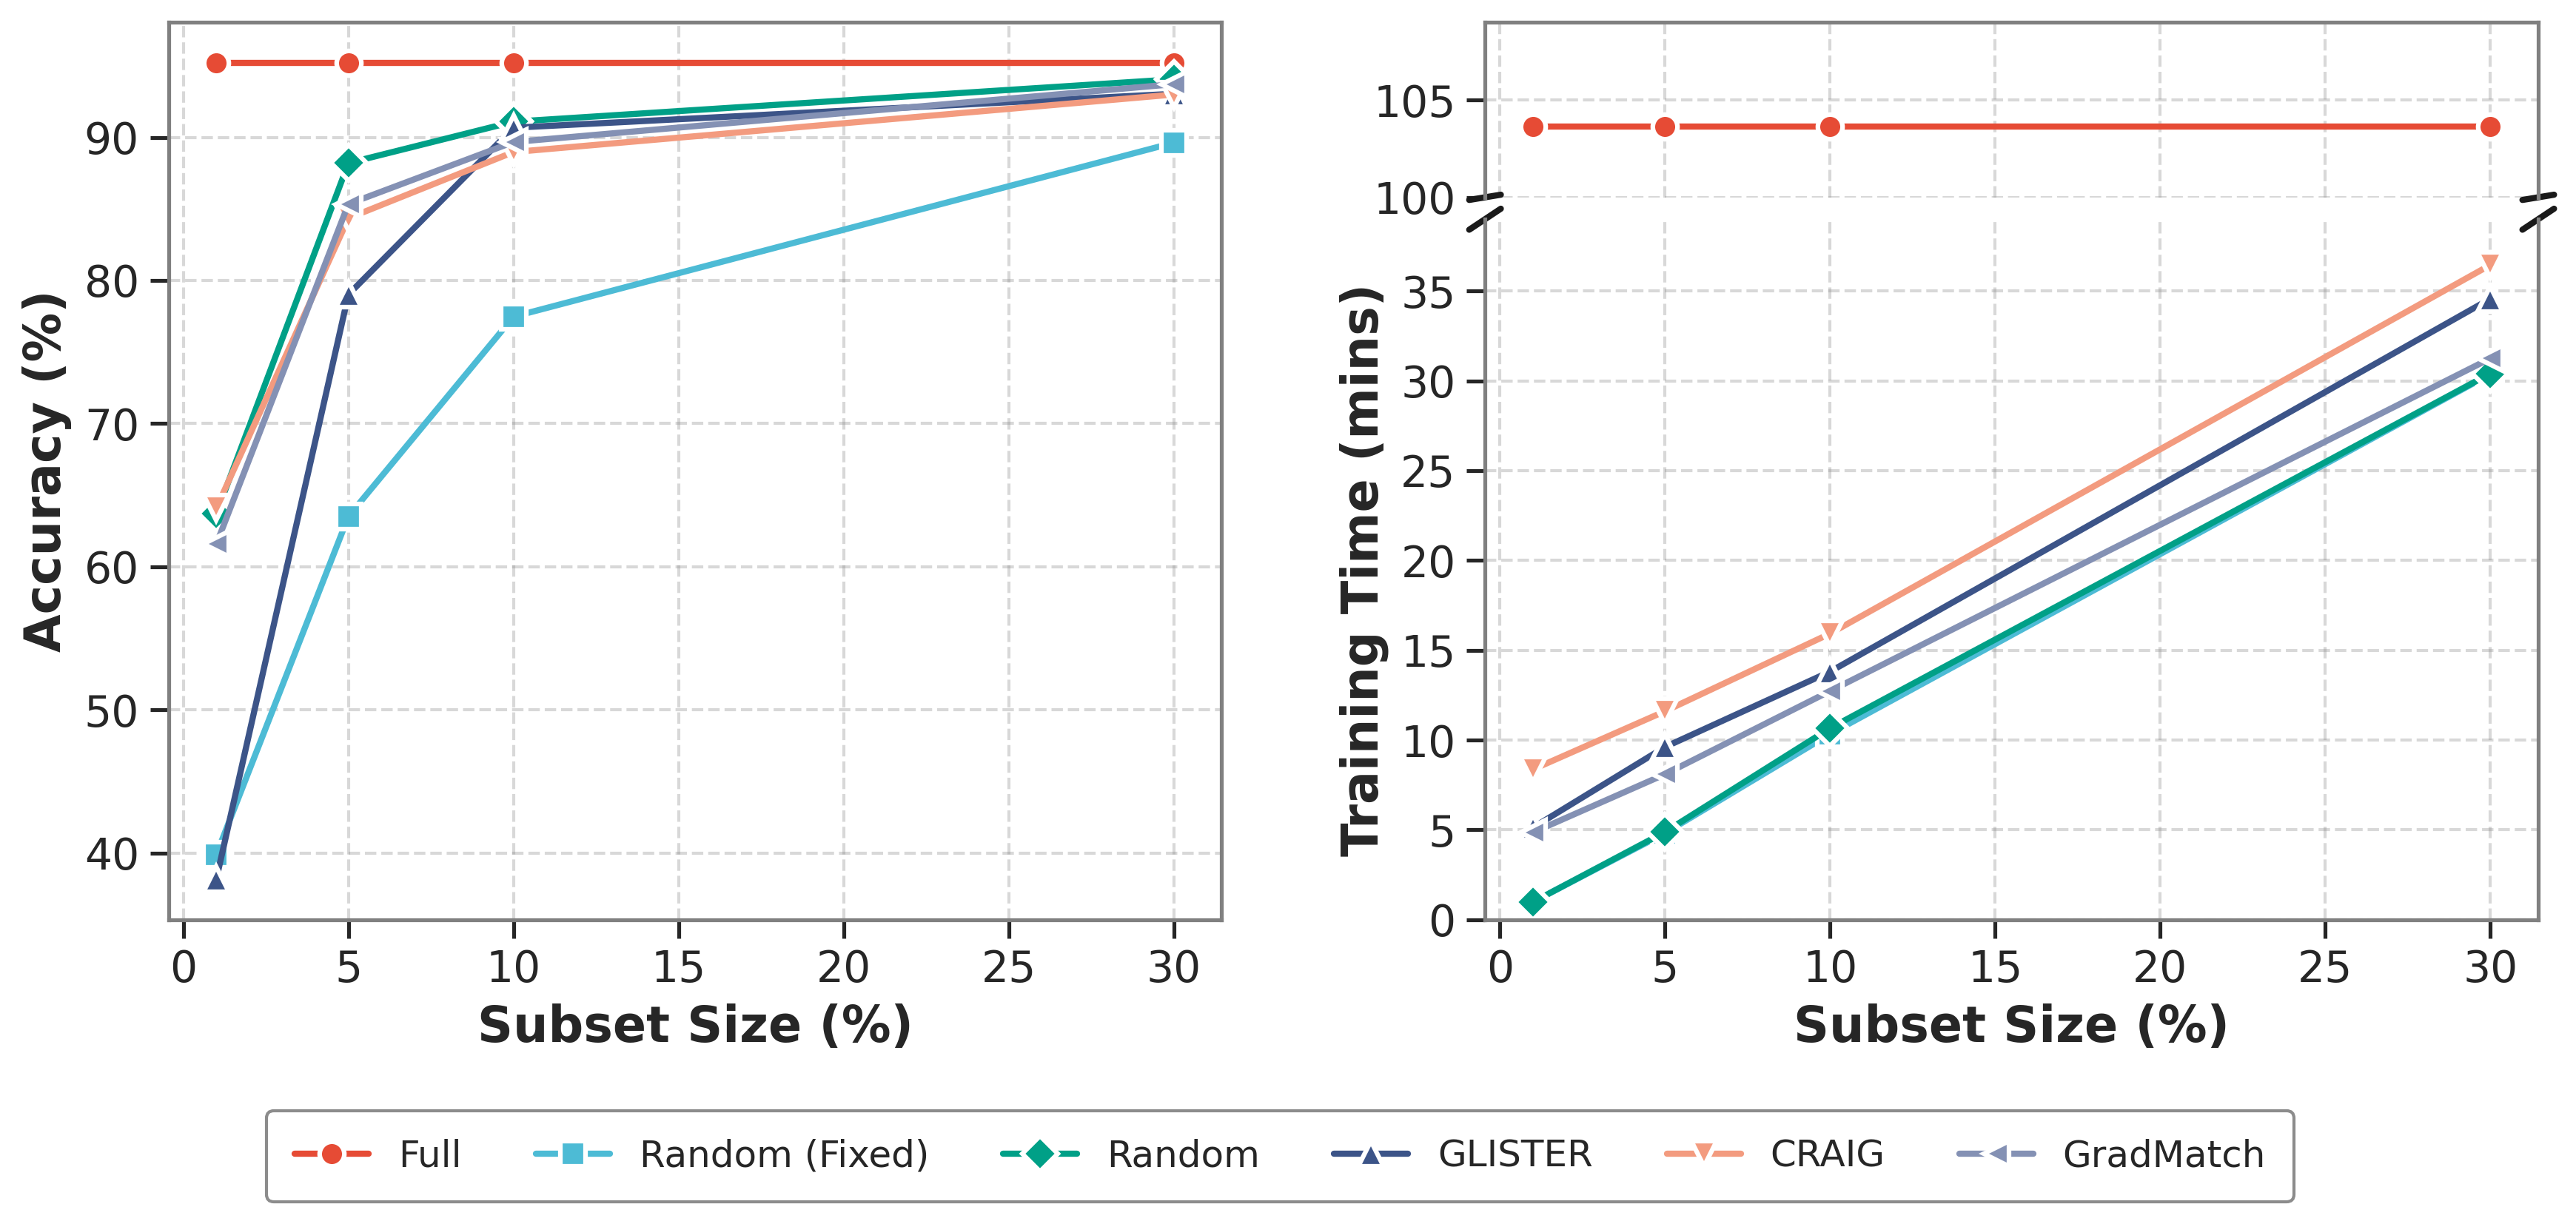

In [25]:
from matplotlib.gridspec import GridSpec

colors_2_extended = [
    '#E64B35', '#4DBBD5', '#00A087', '#3C5488', '#F39B7F',
    '#8491B4', '#91D1C2', '#DC0000', '#7E6148', '#B09C85'
]

rcParams_ticks = {
    'figure.dpi': 300,
    'xtick.bottom': True,
    'ytick.left': True,
    'legend.loc': 'best',
    'legend.fancybox': True,
    'axes.edgecolor': 'grey',
    'axes.xmargin': 0.05,
    'text.usetex': False,
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold',
    'lines.linewidth': 2,
    'lines.markersize': 8
}

sns.set_theme(style='ticks', rc=rcParams_ticks)
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', '8']
linestyles = ['-'] * 10

# Create figure with 2 columns, time plot split into top/bottom
fig = plt.figure(figsize=(11.69, 5))
gs = GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 4], hspace=0.05)

# Create subplots
ax1 = fig.add_subplot(1, 2, 1)  # Regular accuracy plot
ax2_top = fig.add_subplot(gs[0, 1])    # Top time plot
ax2_bottom = fig.add_subplot(gs[1, 1])  # Bottom time plot

# Plot accuracy
for i, (method, val) in enumerate(plt_dict_acc.items()):
    ax1.plot(subset_sizes, val,
             linestyle=linestyles[i],
             marker=markers[i],
             color=colors_2_extended[i],
             label=method,
             markersize=8,
             markeredgewidth=1.5,
             markeredgecolor='white',
             linewidth=2)

# Plot time (split view)
for i, (method, val) in enumerate(plt_dict_time.items()):
    ax2_bottom.plot(subset_sizes, val,
                   linestyle=linestyles[i],
                   marker=markers[i],
                   color=colors_2_extended[i],
                   label=method,
                   markersize=8,
                   markeredgewidth=1.5,
                   markeredgecolor='white',
                   linewidth=2)
    ax2_top.plot(subset_sizes, val,
                 linestyle=linestyles[i],
                 marker=markers[i],
                 color=colors_2_extended[i],
                 label=method,
                 markersize=8,
                 markeredgewidth=1.5,
                 markeredgecolor='white',
                 linewidth=2)

# Set y-limits for split time plot
ax2_top.set_ylim(100, 109)  # (100,109),(90,98),(900,975),(150,167),(150,167),(1000,1110)
ax2_bottom.set_ylim(0, 39)  # (0,39),(0,39),(0,390),(0,65),(0,75),(0,470)

# Break lines for time plot
ax2_top.spines['bottom'].set_visible(False)
ax2_bottom.spines['top'].set_visible(False)
d = .015
kwargs = dict(transform=ax2_top.transAxes, color='k', clip_on=False)
ax2_top.plot((-d, +d), (-d, +d), **kwargs)
ax2_top.plot((1-d, 1+d), (-d, +d), **kwargs)
kwargs.update(transform=ax2_bottom.transAxes)
ax2_bottom.plot((-d, +d), (1-d, 1+d), **kwargs)
ax2_bottom.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

# Common formatting
for ax in [ax1, ax2_top, ax2_bottom]:
    ax.grid(True, linestyle='--', alpha=0.3, color='gray')
    ax.set_facecolor('white')
    ax.tick_params(axis='both', labelsize=14)

# Labels
ax1.set_xlabel('Subset Size (%)', fontsize=16, fontweight='bold')
ax2_bottom.set_xlabel('Subset Size (%)', fontsize=16, fontweight='bold')
ax1.set_ylabel('Accuracy (%)', fontsize=16, fontweight='bold')
ax2_bottom.set_ylabel('Training Time (mins)', fontsize=16, fontweight='bold')

# # Remove x-ticks from top time plot
# ax2_top.set_xticks([])
# Instead of removing x-ticks completely, make them invisible but keep gridlines
ax2_top.tick_params(axis='x', colors='white')  # Make x-ticks white (invisible)
ax2_top.set_xticklabels([])  # Remove x-tick labels

# Legend
if not include_stdev:
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels,
              bbox_to_anchor=(0.5, 0),
              loc='upper center',
              ncol=len(plt_dict_acc.keys()),
              fontsize=12,
              frameon=True,
              framealpha=0.9,
              edgecolor='gray',
              fancybox=True,
              borderpad=0.75,
              labelspacing=0.5)

plt.tight_layout()
plt.subplots_adjust(wspace=0.25)  # Increase horizontal space between subplots
fig.set_facecolor('white')

plt.savefig(f"dss_{fname}.pdf", bbox_inches='tight')